# 시작

In [ ]:
from IPython.display import display
import IPython
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import sklearn as skl
%matplotlib notebook
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
from torch.nn import CrossEntropyLoss
import torchvision
import torchvision.transforms as transforms
import random
import math
pd.options.mode.chained_assignment = None 


In [ ]:

USE_CUDA = torch.cuda.is_available() # GPU를 사용가능하면 True, 아니라면 False를 리턴
device = torch.device("cuda" if USE_CUDA else "cpu") # GPU 사용 가능하면 사용하고 아니면 CPU 사용
print("다음 기기로 학습합니다:", device)

# for reproducibility
random.seed(0)
torch.manual_seed(0)
if device == 'cuda':
    torch.cuda.manual_seed_all(0)

다음 기기로 학습합니다: cuda


In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


# 데이터 불러오기

In [ ]:
trainset=pd.read_csv('/gdrive/My Drive/Colab Notebooks/KU-BIG/KUBIG_Contest/민제_전처리_1.csv')


In [ ]:
display(trainset.head(10))
display(trainset.info())

,Unnamed: 0,class,aa_000,ac_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,...,cs_008,cs_009,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,0.0,-0.085425,-0.469621,-0.044657,-0.057634,-0.011438,-0.023857,-0.056627,-0.112747,-0.159495,-0.073990,-0.057209,-0.027926,0.005575,-0.028788,-0.151244,-0.052504,-0.024472,-0.017399,-0.106995,-0.106680,-0.140740,-0.157679,-0.145587,-0.038774,-0.109719,-0.009607,-0.043552,-0.011975,0.014892,-0.067880,-0.02369,-0.019835,-0.02618,-0.035214,-0.031705,-0.028583,-0.058202,-0.044304,...,0.006762,-0.004310,-0.161610,-0.084151,-0.009804,-0.045113,-0.016264,-0.108238,-0.008932,-0.031012,-0.025561,-0.027766,-0.133746,-0.197490,0.085423,-0.067496,-0.184082,-0.238649,-0.195685,0.550493,0.182234,-0.221008,-0.154862,-0.019853,-0.031421,-0.054462,-0.173449,-0.182918,-0.123299,-0.088440,-0.013829,-0.023071,-0.058547,-0.010437,-0.102150,-0.141597,-0.035695,-0.029865,-0.021618,-0.02795
1,1,0.0,-0.135892,-0.469620,-0.044657,-0.057634,-0.011438,-0.023857,-0.056627,-0.112747,-0.179238,-0.320756,-0.133992,0.062632,0.028038,-0.023242,-0.248611,-0.052504,-0.024472,-0.017399,-0.108551,-0.108872,-0.236095,-0.231690,-0.235862,-0.221400,-0.109719,-0.009607,-0.043552,-0.011975,0.088232,0.019278,-0.02369,-0.019835,-0.02618,-0.035214,-0.031705,0.022195,0.017210,-0.218853,...,-0.011952,-0.004310,-0.221223,-0.252176,-0.009804,-0.045113,-0.016264,-0.108238,-0.008932,-0.031012,-0.025561,-0.027766,-0.236751,-0.246584,-0.250690,-0.067496,-0.184082,-0.229827,-0.236460,-0.362460,-0.281661,0.171168,-0.082658,-0.019853,-0.031421,0.202559,-0.190675,-0.212033,-0.187804,-0.207339,-0.255937,-0.252265,-0.231134,-0.083086,0.036325,-0.078690,-0.284071,-0.172601,-0.021618,-0.02795
2,2,0.0,0.771980,0.078003,-0.044657,-0.057634,-0.011438,-0.023857,-0.056627,-0.101193,0.068360,2.374500,1.373716,0.119805,-0.109801,-0.029692,1.085269,-0.052504,-0.022147,-0.017399,-0.081840,-0.071476,1.380699,1.388517,0.868201,0.960876,-0.109719,-0.009607,-0.043552,-0.011975,-0.030860,-0.169828,-0.02369,-0.019835,-0.02618,-0.035214,-0.031705,2.731595,2.856946,0.009923,...,-0.025914,-0.004310,0.246683,0.089207,-0.009804,-0.045113,-0.016264,-0.108238,-0.008932,-0.031012,-0.025561,-0.027766,0.922768,1.885709,1.414269,-0.063430,-0.138937,1.014112,1.014496,0.633876,0.501146,-0.218476,-0.094394,-0.019853,-0.031421,0.328661,0.992472,1.160091,0.192523,1.565673,2.617089,4.010169,2.589235,0.509328,0.088539,-0.085477,0.073482,-0.149270,-0.021618,-0.02795
3,3,0.0,-0.228147,-0.469622,-0.044657,-0.057634,-0.011438,-0.023857,-0.056627,-0.112747,-0.179370,-0.313656,-0.319613,-0.302890,-0.137121,-0.030284,-0.369035,-0.052504,-0.022182,-0.017399,-0.108551,-0.108872,-0.380718,-0.376328,-0.293230,-0.315121,-0.109719,-0.009607,-0.043552,-0.011975,-0.157455,-0.247478,-0.02369,-0.019835,-0.02618,-0.035214,-0.031705,-0.077234,-0.243252,-0.270728,...,-0.022646,-0.004310,-0.305584,-0.232173,-0.009804,-0.045113,-0.016264,-0.108238,-0.008932,-0.031012,-0.025561,-0.027766,-0.300314,-0.358074,-0.385775,-0.067496,-0.184082,-0.375949,-0.365942,-0.362518,-0.281963,-0.221008,-0.154862,-0.019853,-0.031421,-0.132561,-0.334204,-0.352845,-0.260918,-0.271319,-0.320935,-0.316426,-0.295872,-0.273665,-0.256506,-0.187866,-0.280340,-0.178842,-0.021618,-0.02795
4,4,0.0,-0.253059,-0.469621,-0.044657,-0.057634,-0.011438,-0.023857,-0.056627,-0.112747,-0.179276,-0.325230,-0.400656,-0.327105,-0.154333,-0.030284,-0.416315,-0.052504,-0.024472,-0.017399,-0.108551,-0.108872,-0.425513,-0.420521,-0.318249,-0.342953,-0.109719,-0.009607,-0.043552,-0.011975,-0.161122,0.027202,-0.02369,-0.019835,-0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57000 entries, 0 to 56999
Columns: 148 entries, Unnamed: 0 to eg_000
dtypes: float64(147), int64(1)
memory usage: 64.4 MB


None

In [ ]:
%cd /gdrive

/gdrive


In [ ]:
columns=trainset.columns.to_list()

In [ ]:
from pandas import Series
a=[]
for i in columns:
  a.append(len(trainset[i].unique()))

a=Series(a)
a=a.to_dict()
display(a)

{0: 57000,
 1: 2,
 2: 21527,
 3: 3843,
 4: 411,
 5: 496,
 6: 176,
 7: 669,
 8: 2459,
 9: 7938,
 10: 22786,
 11: 39823,
 12: 39636,
 13: 31264,
 14: 18685,
 15: 5425,
 16: 42425,
 17: 4125,
 18: 1088,
 19: 238,
 20: 9272,
 21: 10753,
 22: 46786,
 23: 46348,
 24: 43502,
 25: 34239,
 26: 158,
 27: 25,
 28: 3528,
 29: 60,
 30: 5100,
 31: 3362,
 32: 489,
 33: 908,
 34: 962,
 35: 1013,
 36: 1738,
 37: 19302,
 38: 33621,
 39: 37646,
 40: 37033,
 41: 476,
 42: 9527,
 43: 7650,
 44: 9352,
 45: 21356,
 46: 33342,
 47: 43377,
 48: 12395,
 49: 3955,
 50: 1277,
 51: 334,
 52: 43669,
 53: 39183,
 54: 35237,
 55: 32176,
 56: 30098,
 57: 29018,
 58: 28670,
 59: 24736,
 60: 11779,
 61: 6871,
 62: 47939,
 63: 4424,
 64: 5303,
 65: 5606,
 66: 2022,
 67: 42422,
 68: 24913,
 69: 41021,
 70: 37515,
 71: 13266,
 72: 43688,
 73: 47948,
 74: 47942,
 75: 53209,
 76: 22343,
 77: 18277,
 78: 27681,
 79: 29890,
 80: 44880,
 81: 1,
 82: 22803,
 83: 44441,
 84: 7463,
 85: 43584,
 86: 2262,
 87: 3934,
 88: 1570,
 89:

In [ ]:
sorted(a.items(),key=lambda x : x[1])

[(81, 1),
 (1, 2),
 (27, 25),
 (146, 36),
 (29, 60),
 (147, 63),
 (131, 64),
 (109, 67),
 (116, 81),
 (26, 158),
 (132, 174),
 (6, 176),
 (118, 176),
 (119, 219),
 (19, 238),
 (117, 272),
 (51, 334),
 (4, 411),
 (41, 476),
 (32, 489),
 (5, 496),
 (112, 513),
 (7, 669),
 (33, 908),
 (34, 962),
 (35, 1013),
 (108, 1013),
 (18, 1088),
 (50, 1277),
 (113, 1439),
 (88, 1570),
 (114, 1617),
 (36, 1738),
 (66, 2022),
 (86, 2262),
 (8, 2459),
 (97, 3219),
 (31, 3362),
 (111, 3459),
 (98, 3475),
 (28, 3528),
 (101, 3618),
 (3, 3843),
 (87, 3934),
 (49, 3955),
 (17, 4125),
 (63, 4424),
 (30, 5100),
 (64, 5303),
 (15, 5425),
 (89, 5561),
 (65, 5606),
 (115, 6343),
 (61, 6871),
 (84, 7463),
 (130, 7583),
 (43, 7650),
 (124, 7656),
 (9, 7938),
 (135, 7998),
 (110, 8328),
 (123, 8988),
 (20, 9272),
 (44, 9352),
 (42, 9527),
 (100, 9583),
 (145, 9653),
 (96, 10153),
 (21, 10753),
 (60, 11779),
 (48, 12395),
 (71, 13266),
 (122, 13320),
 (90, 14788),
 (129, 15570),
 (107, 17406),
 (126, 17701),
 (77, 

In [ ]:
erase_columns=[columns[81],columns[27]]
display(erase_columns)

['cd_000', 'as_000']

In [ ]:
train_erased=trainset.drop(erase_columns,axis=1)
display(train_erased)

,Unnamed: 0,class,aa_000,ac_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,...,cs_008,cs_009,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,0.0,-0.085425,-0.469621,-0.044657,-0.057634,-0.011438,-0.023857,-0.056627,-0.112747,-0.159495,-0.073990,-0.057209,-0.027926,0.005575,-0.028788,-0.151244,-0.052504,-0.024472,-0.017399,-0.106995,-0.106680,-0.140740,-0.157679,-0.145587,-0.038774,-0.109719,-0.043552,-0.011975,0.014892,-0.067880,-0.02369,-0.019835,-0.02618,-0.035214,-0.031705,-0.028583,-0.058202,-0.044304,-0.119474,...,0.006762,-0.00431,-0.161610,-0.084151,-0.009804,-0.045113,-0.016264,-0.108238,-0.008932,-0.031012,-0.025561,-0.027766,-0.133746,-0.197490,0.085423,-0.067496,-0.184082,-0.238649,-0.195685,0.550493,0.182234,-0.221008,-0.154862,-0.019853,-0.031421,-0.054462,-0.173449,-0.182918,-0.123299,-0.088440,-0.013829,-0.023071,-0.058547,-0.010437,-0.102150,-0.141597,-0.035695,-0.029865,-0.021618,-0.02795
1,1,0.0,-0.135892,-0.469620,-0.044657,-0.057634,-0.011438,-0.023857,-0.056627,-0.112747,-0.179238,-0.320756,-0.133992,0.062632,0.028038,-0.023242,-0.248611,-0.052504,-0.024472,-0.017399,-0.108551,-0.108872,-0.236095,-0.231690,-0.235862,-0.221400,-0.109719,-0.043552,-0.011975,0.088232,0.019278,-0.02369,-0.019835,-0.02618,-0.035214,-0.031705,0.022195,0.017210,-0.218853,-0.227620,...,-0.011952,-0.00431,-0.221223,-0.252176,-0.009804,-0.045113,-0.016264,-0.108238,-0.008932,-0.031012,-0.025561,-0.027766,-0.236751,-0.246584,-0.250690,-0.067496,-0.184082,-0.229827,-0.236460,-0.362460,-0.281661,0.171168,-0.082658,-0.019853,-0.031421,0.202559,-0.190675,-0.212033,-0.187804,-0.207339,-0.255937,-0.252265,-0.231134,-0.083086,0.036325,-0.078690,-0.284071,-0.172601,-0.021618,-0.02795
2,2,0.0,0.771980,0.078003,-0.044657,-0.057634,-0.011438,-0.023857,-0.056627,-0.101193,0.068360,2.374500,1.373716,0.119805,-0.109801,-0.029692,1.085269,-0.052504,-0.022147,-0.017399,-0.081840,-0.071476,1.380699,1.388517,0.868201,0.960876,-0.109719,-0.043552,-0.011975,-0.030860,-0.169828,-0.02369,-0.019835,-0.02618,-0.035214,-0.031705,2.731595,2.856946,0.009923,0.108026,...,-0.025914,-0.00431,0.246683,0.089207,-0.009804,-0.045113,-0.016264,-0.108238,-0.008932,-0.031012,-0.025561,-0.027766,0.922768,1.885709,1.414269,-0.063430,-0.138937,1.014112,1.014496,0.633876,0.501146,-0.218476,-0.094394,-0.019853,-0.031421,0.328661,0.992472,1.160091,0.192523,1.565673,2.617089,4.010169,2.589235,0.509328,0.088539,-0.085477,0.073482,-0.149270,-0.021618,-0.02795
3,3,0.0,-0.228147,-0.469622,-0.044657,-0.057634,-0.011438,-0.023857,-0.056627,-0.112747,-0.179370,-0.313656,-0.319613,-0.302890,-0.137121,-0.030284,-0.369035,-0.052504,-0.022182,-0.017399,-0.108551,-0.108872,-0.380718,-0.376328,-0.293230,-0.315121,-0.109719,-0.043552,-0.011975,-0.157455,-0.247478,-0.02369,-0.019835,-0.02618,-0.035214,-0.031705,-0.077234,-0.243252,-0.270728,-0.227535,...,-0.022646,-0.00431,-0.305584,-0.232173,-0.009804,-0.045113,-0.016264,-0.108238,-0.008932,-0.031012,-0.025561,-0.027766,-0.300314,-0.358074,-0.385775,-0.067496,-0.184082,-0.375949,-0.365942,-0.362518,-0.281963,-0.221008,-0.154862,-0.019853,-0.031421,-0.132561,-0.334204,-0.352845,-0.260918,-0.271319,-0.320935,-0.316426,-0.295872,-0.273665,-0.256506,-0.187866,-0.280340,-0.178842,-0.021618,-0.02795
4,4,0.0,-0.253059,-0.469621,-0.044657,-0.057634,-0.011438,-0.023857,-0.056627,-0.112747,-0.179276,-0.325230,-0.400656,-0.327105,-0.154333,-0.030284,-0.416315,-0.052504,-0.024472,-0.017399,-0.108551,-0.108872,-0.425513,-0.420521,-0.318249,-0.342953,-0.109719,-0.043552,-0.011975,-0.161122,0.027202,-0.02369,-0.019835,-0.02618,-0.03521

In [ ]:
train_erased=train_erased.drop('Unnamed: 0',axis=1)
display(train_erased)

,class,aa_000,ac_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,...,cs_008,cs_009,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0.0,-0.085425,-0.469621,-0.044657,-0.057634,-0.011438,-0.023857,-0.056627,-0.112747,-0.159495,-0.073990,-0.057209,-0.027926,0.005575,-0.028788,-0.151244,-0.052504,-0.024472,-0.017399,-0.106995,-0.106680,-0.140740,-0.157679,-0.145587,-0.038774,-0.109719,-0.043552,-0.011975,0.014892,-0.067880,-0.02369,-0.019835,-0.02618,-0.035214,-0.031705,-0.028583,-0.058202,-0.044304,-0.119474,-0.013243,...,0.006762,-0.00431,-0.161610,-0.084151,-0.009804,-0.045113,-0.016264,-0.108238,-0.008932,-0.031012,-0.025561,-0.027766,-0.133746,-0.197490,0.085423,-0.067496,-0.184082,-0.238649,-0.195685,0.550493,0.182234,-0.221008,-0.154862,-0.019853,-0.031421,-0.054462,-0.173449,-0.182918,-0.123299,-0.088440,-0.013829,-0.023071,-0.058547,-0.010437,-0.102150,-0.141597,-0.035695,-0.029865,-0.021618,-0.02795
1,0.0,-0.135892,-0.469620,-0.044657,-0.057634,-0.011438,-0.023857,-0.056627,-0.112747,-0.179238,-0.320756,-0.133992,0.062632,0.028038,-0.023242,-0.248611,-0.052504,-0.024472,-0.017399,-0.108551,-0.108872,-0.236095,-0.231690,-0.235862,-0.221400,-0.109719,-0.043552,-0.011975,0.088232,0.019278,-0.02369,-0.019835,-0.02618,-0.035214,-0.031705,0.022195,0.017210,-0.218853,-0.227620,-0.013243,...,-0.011952,-0.00431,-0.221223,-0.252176,-0.009804,-0.045113,-0.016264,-0.108238,-0.008932,-0.031012,-0.025561,-0.027766,-0.236751,-0.246584,-0.250690,-0.067496,-0.184082,-0.229827,-0.236460,-0.362460,-0.281661,0.171168,-0.082658,-0.019853,-0.031421,0.202559,-0.190675,-0.212033,-0.187804,-0.207339,-0.255937,-0.252265,-0.231134,-0.083086,0.036325,-0.078690,-0.284071,-0.172601,-0.021618,-0.02795
2,0.0,0.771980,0.078003,-0.044657,-0.057634,-0.011438,-0.023857,-0.056627,-0.101193,0.068360,2.374500,1.373716,0.119805,-0.109801,-0.029692,1.085269,-0.052504,-0.022147,-0.017399,-0.081840,-0.071476,1.380699,1.388517,0.868201,0.960876,-0.109719,-0.043552,-0.011975,-0.030860,-0.169828,-0.02369,-0.019835,-0.02618,-0.035214,-0.031705,2.731595,2.856946,0.009923,0.108026,-0.013243,...,-0.025914,-0.00431,0.246683,0.089207,-0.009804,-0.045113,-0.016264,-0.108238,-0.008932,-0.031012,-0.025561,-0.027766,0.922768,1.885709,1.414269,-0.063430,-0.138937,1.014112,1.014496,0.633876,0.501146,-0.218476,-0.094394,-0.019853,-0.031421,0.328661,0.992472,1.160091,0.192523,1.565673,2.617089,4.010169,2.589235,0.509328,0.088539,-0.085477,0.073482,-0.149270,-0.021618,-0.02795
3,0.0,-0.228147,-0.469622,-0.044657,-0.057634,-0.011438,-0.023857,-0.056627,-0.112747,-0.179370,-0.313656,-0.319613,-0.302890,-0.137121,-0.030284,-0.369035,-0.052504,-0.022182,-0.017399,-0.108551,-0.108872,-0.380718,-0.376328,-0.293230,-0.315121,-0.109719,-0.043552,-0.011975,-0.157455,-0.247478,-0.02369,-0.019835,-0.02618,-0.035214,-0.031705,-0.077234,-0.243252,-0.270728,-0.227535,-0.013243,...,-0.022646,-0.00431,-0.305584,-0.232173,-0.009804,-0.045113,-0.016264,-0.108238,-0.008932,-0.031012,-0.025561,-0.027766,-0.300314,-0.358074,-0.385775,-0.067496,-0.184082,-0.375949,-0.365942,-0.362518,-0.281963,-0.221008,-0.154862,-0.019853,-0.031421,-0.132561,-0.334204,-0.352845,-0.260918,-0.271319,-0.320935,-0.316426,-0.295872,-0.273665,-0.256506,-0.187866,-0.280340,-0.178842,-0.021618,-0.02795
4,0.0,-0.253059,-0.469621,-0.044657,-0.057634,-0.011438,-0.023857,-0.056627,-0.112747,-0.179276,-0.325230,-0.400656,-0.327105,-0.154333,-0.030284,-0.416315,-0.052504,-0.024472,-0.017399,-0.108551,-0.108872,-0.425513,-0.420521,-0.318249,-0.342953,-0.109719,-0.043552,-0.011975,-0.161122,0.027202,-0.02369,-

## Train, Valid 구분

In [ ]:
from itertools import chain, repeat
import random

length=len(train_erased)

np.random.seed(3)
p=list(repeat(1/length,length)) # N = #of total sample

#1.
num_list=np.arange(length)
train_index=np.random.choice(num_list,int(0.8*length),replace=False,p=p) # dtype=ndarray
train_index=train_index.tolist() # dtype=list

#2.
valid_index=np.delete(num_list,train_index)

In [ ]:
train = train_erased.iloc[train_index]
display(train.shape)
valid= train_erased.iloc[valid_index]
display(valid.shape)

(45600, 145)

(11400, 145)

## x,y 구분

In [ ]:
x_train=train.iloc[:,1:]
y_train=train['class'].map({0.0:0,1.0:1})

display(type(y_train[0]))
x_valid=valid.iloc[:,1:]
y_valid=valid['class'].map({0.0:0,1.0:1})

display(x_train.shape,y_train.shape,x_valid.shape,y_valid.shape)

numpy.int64

(45600, 144)

(45600,)

(11400, 144)

(11400,)

In [ ]:
y_train.tail(500)

47576    0
34126    0
316      0
6563     0
5115     0
        ..
46944    0
29909    0
44678    0
7438     0
55714    0
Name: class, Length: 500, dtype: int64

## Torch로 변환 : Custom Dataset 만들기

In [ ]:
class Trainset(Dataset): 
  def __init__(self):
    self.x_data = torch.from_numpy(np.array(x_train)).view(-1,1,12,12)
    #self.x_data = torch.Tensor(self.x_data,requires_grad=True)
    self.y_data =torch.from_numpy(np.array(y_train))
    #self.y_data = torch.Tensor(self.y_data,requires_grad=True)

  # 총 데이터의 개수를 리턴
  def __len__(self): 
    return len(self.x_data)

  # 인덱스를 입력받아 그에 맵핑되는 입출력 데이터를 파이토치의 Tensor 형태로 리턴
  def __getitem__(self, idx): 
    x = self.x_data[idx]
    y = self.y_data[idx]
    return x, y

In [ ]:
class Validset(Dataset): 
  def __init__(self):
    self.x_data = torch.from_numpy(np.array(x_valid)).view(-1,1,12,12)
    self.y_data = torch.from_numpy(np.array(y_valid))

  # 총 데이터의 개수를 리턴
  def __len__(self): 
    return len(self.x_data)

  # 인덱스를 입력받아 그에 맵핑되는 입출력 데이터를 파이토치의 Tensor 형태로 리턴
  def __getitem__(self, idx): 
    x = self.x_data[idx]
    y = self.y_data[idx]
    return x, y

In [ ]:
torch.sum(Trainset().y_data==0)
len(Trainset().y_data)

45600

In [ ]:
trainset=Trainset()
validset=Validset()
trainloader = DataLoader(trainset, batch_size=128, shuffle=True,drop_last=True)
validloader = DataLoader(validset, batch_size=128, shuffle=True, drop_last=True)

dataiter = iter(trainloader)
 #iter는 원하는 값이 나올 때 까지 특정대상을 계속 돌림
images, labels = dataiter.next() 

display(images.shape)
display(images[0])

dataiter = iter(validloader)
 #iter는 원하는 값이 나올 때 까지 특정대상을 계속 돌림
images, labels = dataiter.next() 

display(images.shape)
display(images[0])

torch.Size([128, 1, 12, 12])

tensor([[[-4.4143e-02, -4.6962e-01, -4.4657e-02, -5.7634e-02, -1.1438e-02,
          -2.3857e-02, -5.6627e-02,  2.2989e-01,  5.9241e-01,  2.2473e-01,
          -2.8236e-01, -2.6216e-01],
         [-1.0828e-01, -2.9941e-02, -8.7017e-02, -5.2504e-02, -2.4472e-02,
          -1.7399e-02,  1.8684e-01,  1.5597e-01,  5.0287e-02,  7.8468e-02,
          -5.7094e-02, -3.4826e-03],
         [ 5.8220e-01, -4.3552e-02, -1.1975e-02, -1.3066e-01, -1.2466e-01,
          -2.3690e-02, -1.9835e-02, -2.6180e-02, -3.5214e-02, -3.1705e-02,
          -8.0286e-02, -3.2330e-01],
         [-2.1294e-01,  7.6368e-01, -1.3243e-02, -7.3198e-02, -8.0652e-02,
          -5.4534e-02, -1.2491e-01, -3.4734e-01, -3.0311e-01,  4.4765e+00,
           1.2568e+00,  1.0422e+01],
         [-1.3341e-02,  3.3257e-01, -7.7472e-02, -4.4833e-03,  1.0816e-02,
           1.0197e-02, -8.9560e-02, -1.8281e-01, -2.1165e-01,  4.4551e-02,
           2.5260e-01,  2.9602e-02],
         [-1.3348e-01,  2.0191e-02,  1.2370e-01, -1.4443e-01, -8.

torch.Size([128, 1, 12, 12])

tensor([[[ 0.1555,  2.2685, -0.0447, -0.0576, -0.0114, -0.0239, -0.0566,
          -0.1127, -0.1783, -0.0329,  0.4528,  0.5425],
         [ 0.1365, -0.0226,  0.1476, -0.0525, -0.0245, -0.0174, -0.1086,
          -0.1089,  0.2244,  0.2466, -0.0582,  0.0146],
         [-0.1097, -0.0436, -0.0120, -0.1307, -0.1960, -0.0237, -0.0198,
          -0.0262, -0.0352, -0.0317,  0.0596,  0.6662],
         [ 0.0446, -0.1292, -0.0132, -0.0770, -0.1013, -0.0632, -0.1268,
          -0.3145,  0.5082, -0.1132, -0.0639, -0.0445],
         [-0.0133, -0.0372,  0.3920,  0.2133,  0.3590,  0.3954,  0.2479,
           0.1357,  0.3703, -0.1316, -0.1011,  0.1377],
         [-0.1389, -0.1608, -0.1129, -0.1515,  0.1476, -0.0316,  0.0114,
          -0.1093, -0.6537,  0.1557,  0.1377,  0.1377],
         [ 0.1772,  0.2772, -0.0716, -0.8279, -0.7345,  0.1930,  0.3284,
           0.2071, -0.0924, -0.0910, -0.1237, -0.0590],
         [-0.0355, -0.0774, -0.1460, -0.1868,  0.1796,  0.4687,  0.3653,
          -0.0256, -0.06

# 모델링 시작

## Model Structure

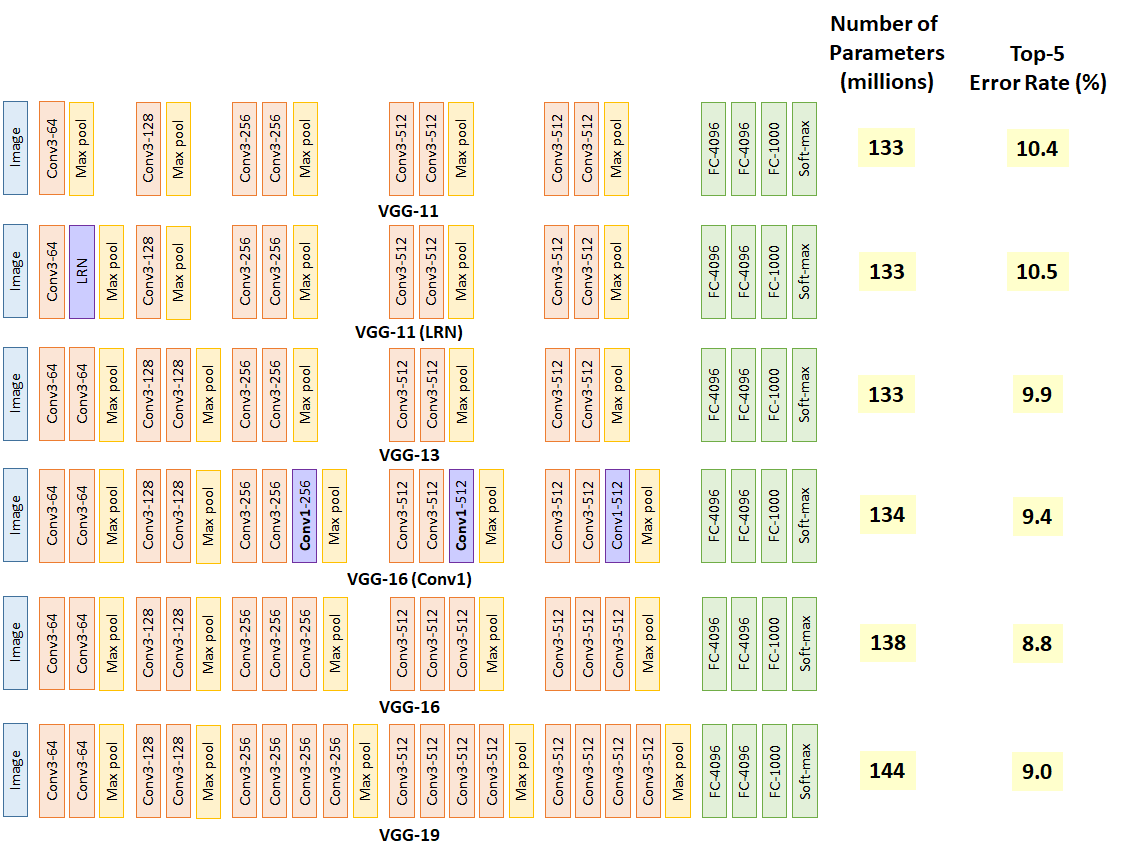

## 1) CNN_Softmax

In [ ]:
from math import sqrt
class CNN_Softmax(torch.nn.Module):

    def __init__(self):
        super(CNN_Softmax, self).__init__()

        # 1/12
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(32),
            torch.nn.ReLU(),
            torch.nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(32),
            torch.nn.ReLU(),
            torch.nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(32),
            torch.nn.ReLU())
        # 32/12
        self.maxpool=torch.nn.MaxPool2d(kernel_size=2,stride=2)

        # 32/6
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(64),
            torch.nn.ReLU(),
            torch.nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(64),
            torch.nn.ReLU(),
            torch.nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(64),
            torch.nn.ReLU())
        #64/6
        self.maxpool=torch.nn.MaxPool2d(kernel_size=2,stride=2)

        #64/3
        self.layer3 = torch.nn.Sequential(
            torch.nn.Conv2d(64, 128, kernel_size=1, stride=1),
            torch.nn.BatchNorm2d(128),
            torch.nn.ReLU(),
            torch.nn.Conv2d(128, 128, kernel_size=1, stride=1),
            torch.nn.BatchNorm2d(128),
            torch.nn.ReLU())
     
        # 128/3
        self.fc=torch.nn.Sequential(
            torch.nn.Linear(3* 3 * 128, 128, bias=True),
            torch.nn.Dropout(0.5),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 2, bias=True))
       
        self.result_layer=torch.nn.Softmax()
        
                 
        # 전결합층 한정으로 가중치 초기화
        #torch.nn.init.normal_(self.result_layer.weight,std=sqrt(2/10))

    def forward(self, x):
        out = self.layer1(x)
        out= self.maxpool(out)
        out = self.layer2(out)
        out= self.maxpool(out)
        out = self.layer3(out)
        out = out.view(-1,3*3*128)    # 전결합층을 위해서 Flatten
        out = self.fc(out)
        out = self.result_layer(out)
        return out

## 2) CNN_Sigmoid

In [ ]:
from math import sqrt
class CNN_Sigmoid(torch.nn.Module):

    def __init__(self):
        super(CNN_Sigmoid, self).__init__()

        # 1/12
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(32),
            torch.nn.ReLU(),
            torch.nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(32),
            torch.nn.ReLU(),
            torch.nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(32),
            torch.nn.ReLU())
        # 32/12
        self.maxpool=torch.nn.MaxPool2d(kernel_size=2,stride=2)

        # 32/6
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(64),
            torch.nn.ReLU(),
            torch.nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(64),
            torch.nn.ReLU(),
            torch.nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(64),
            torch.nn.ReLU())
        #64/6
        self.maxpool=torch.nn.MaxPool2d(kernel_size=2,stride=2)

        #64/3
        self.layer3 = torch.nn.Sequential(
            torch.nn.Conv2d(64, 128, kernel_size=1, stride=1),
            torch.nn.BatchNorm2d(128),
            torch.nn.ReLU(),
            torch.nn.Conv2d(128, 128, kernel_size=1, stride=1),
            torch.nn.BatchNorm2d(128),
            torch.nn.ReLU())
     
        # 128/3
        self.fc=torch.nn.Sequential(
            torch.nn.Linear(3* 3 * 128, 128, bias=True),
            torch.nn.Dropout(0.5),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 1, bias=True))
       
        self.result_layer=torch.nn.Sigmoid()
        
                 
        # 전결합층 한정으로 가중치 초기화
        #torch.nn.init.normal_(self.result_layer.weight,std=sqrt(2/10))

    def forward(self, x):
        out = self.layer1(x)
        out= self.maxpool(out)
        out = self.layer2(out)
        out= self.maxpool(out)
        out = self.layer3(out)
        out = out.view(-1,3*3*128)    # 전결합층을 위해서 Flatten
        out = self.fc(out)
        out = self.result_layer(out)
        return out

## 3) FullConv_Softmax

In [ ]:
from math import sqrt
class FullConv_Softmax(torch.nn.Module):

    def __init__(self):
        super(FullConv_Softmax, self).__init__()

        # 1/12
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(1,32,kernel_size=1,stride=1),
            torch.nn.BatchNorm2d(32),
            torch.nn.ReLU(),
            torch.nn.Conv2d(32, 32, kernel_size=1, stride=1),
            torch.nn.BatchNorm2d(32),
            torch.nn.ReLU())
        # 32/12
        self.maxpool=torch.nn.MaxPool2d(kernel_size=2,stride=2)

        # 32/6
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=1, stride=1),
            torch.nn.BatchNorm2d(64),
            torch.nn.ReLU(),
            torch.nn.Conv2d(64, 64, kernel_size=1, stride=1),
            torch.nn.BatchNorm2d(64),
            torch.nn.ReLU())
        #64/6
        self.maxpool=torch.nn.MaxPool2d(kernel_size=2,stride=2)

        #64/3
        self.layer3 = torch.nn.Sequential(
            torch.nn.Conv2d(64, 128, kernel_size=1, stride=1),
            torch.nn.BatchNorm2d(128),
            torch.nn.ReLU(),
            torch.nn.Conv2d(128, 128, kernel_size=1, stride=1),
            torch.nn.BatchNorm2d(128),
            torch.nn.ReLU())
     
        # 128/3
        self.fc=torch.nn.Sequential(
            torch.nn.Linear(3* 3 * 128, 128, bias=True),
            torch.nn.Dropout(0.5),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 2, bias=True))
       
        self.result_layer=torch.nn.Softmax()
        
                 
        # 전결합층 한정으로 가중치 초기화
        #torch.nn.init.normal_(self.result_layer.weight,std=sqrt(2/10))

    def forward(self, x):
        out = self.layer1(x)
        out= self.maxpool(out)
        out = self.layer2(out)
        out= self.maxpool(out)
        out = self.layer3(out)
        out = out.view(-1,3*3*128)    # 전결합층을 위해서 Flatten
        out = self.fc(out)
        out = self.result_layer(out)
        return out

## 4) FullConv_Sigmoid

In [ ]:
from math import sqrt
class FullConv_Sigmoid(torch.nn.Module):

    def __init__(self):
        super(FullConv_Sigmoid, self).__init__()

        # 1/12
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(1,32,kernel_size=1,stride=1),
            torch.nn.BatchNorm2d(32),
            torch.nn.ReLU(),
            torch.nn.Conv2d(32, 32, kernel_size=1, stride=1),
            torch.nn.BatchNorm2d(32),
            torch.nn.ReLU())
        # 32/12
        self.maxpool=torch.nn.MaxPool2d(kernel_size=2,stride=2)

        # 32/6
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=1, stride=1),
            torch.nn.BatchNorm2d(64),
            torch.nn.ReLU(),
            torch.nn.Conv2d(64, 64, kernel_size=1, stride=1),
            torch.nn.BatchNorm2d(64),
            torch.nn.ReLU())
        #64/6
        self.maxpool=torch.nn.MaxPool2d(kernel_size=2,stride=2)

        #64/3
        self.layer3 = torch.nn.Sequential(
            torch.nn.Conv2d(64, 128, kernel_size=1, stride=1),
            torch.nn.BatchNorm2d(128),
            torch.nn.ReLU(),
            torch.nn.Conv2d(128, 128, kernel_size=1, stride=1),
            torch.nn.BatchNorm2d(128),
            torch.nn.ReLU())
     
        # 128/3
        self.fc=torch.nn.Sequential(
            torch.nn.Linear(3* 3 * 128, 128, bias=True),
            torch.nn.Dropout(0.5),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 1, bias=True))
       
        self.result_layer=torch.nn.Sigmoid()
        
                 
        # 전결합층 한정으로 가중치 초기화
        #torch.nn.init.normal_(self.result_layer.weight,std=sqrt(2/10))

    def forward(self, x):
        out = self.layer1(x)
        out= self.maxpool(out)
        out = self.layer2(out)
        out= self.maxpool(out)
        out = self.layer3(out)
        out = out.view(-1,3*3*128)    # 전결합층을 위해서 Flatten
        out = self.fc(out)
        out = self.result_layer(out)
        return out

# Training

## 1) SGD + Momentum

#### (1) CNN

In [ ]:
import torch.optim as optim

training_epochs=7
total_batch = len(trainloader)

#### Loss 함수 : Softmax + CrossEntropy 

In [ ]:
# CNN 모델 정의
model1 = CNN_Softmax().to(device)

#criterion = torch.nn.BCELoss().to(device)    # 비용 함수에 소프트맥스 함수 포함되어져 있음.
criterion = torch.nn.CrossEntropyLoss().to(device)

In [ ]:
print(f'총 Epochs 수 = {training_epochs}')
Loss=[]
ACC=torch.Tensor([])
for epoch in range(training_epochs):
 
  #for lr in learning_rate:
      avg_cost = 0
      CMT_TRN=torch.zeros([2,2],dtype=torch.float64,device=device)
      CMT_VLD=torch.zeros([2,2],dtype=torch.float64,device=device)
      #avg_loss = 0
      total_train=0
      total_valid=0      
      avg_acc=0
      for X_train, Y_train, in trainloader: # 미니 배치 단위로 꺼내온다. X는 미니 배치, Y느 ㄴ레이블.

        validiter=iter(validloader)
        X_valid, Y_valid = validiter.next()
        
        X_train=X_train.to(device,dtype=torch.float)
        Y_train=Y_train.to(device,dtype=torch.long)
        X_valid=X_valid.to(device,dtype=torch.float)
        Y_valid=Y_valid.to(device,dtype=torch.long)
        
        prd_train=torch.Tensor([]).to(device)
        prd_valid=torch.Tensor([]).to(device)
        optimizer1 = torch.optim.SGD(model1.parameters(), lr=0.1, momentum=0.9)
        optimizer1.zero_grad()

        out_train = model1(X_train)
        out_valid = model1(X_valid)

        prd_train = torch.cat((prd_train, out_train),dim=0).to(device)
        prd_valid = torch.cat((prd_valid, out_valid),dim=0).to(device)

        stack_train = torch.stack((Y_train, prd_train.argmax(dim=1)), dim=1)
        stack_valid = torch.stack((Y_valid, prd_valid.argmax(dim=1)), dim=1)
        #이때 positive=0 / negative= 1 이 나옴
        cmt_train = torch.zeros(2,2, dtype=torch.float64)
        cmt_valid = torch.zeros(2,2, dtype=torch.float64)
        
        for p in stack_train:
          tl, pl = p.tolist()
          cmt_train[tl, pl] = cmt_train[tl, pl] + 1.0
        
        CMT_TRN+=cmt_train.to(device)
        loss_train = 500*cmt_train[0,1] + 10*cmt_train[1,0]
        
        for p in stack_valid:
          tl, pl = p.tolist()
          cmt_valid[tl, pl] = cmt_valid[tl, pl] + 1.0
        
        CMT_VLD+=cmt_valid.to(device)
        loss_valid = 500*cmt_valid[0,1] + 10*cmt_valid[1,0]

        cost = criterion(out_train,Y_train)
        cost.backward()
        optimizer1.step()

        avg_cost += cost / total_batch
        #avg_loss += loss / total_batch
        
        y_pred = model1.forward(X_train) # forward 연산
        correct_prediction = torch.argmax(y_pred, 1) == Y_train
        accuracy = correct_prediction.int().sum()
        avg_acc+=accuracy


        
        total_train+=loss_train
        #total_train//=len(trainset)
        total_valid+=loss_valid
        #total_valid//=len(validset)
        #Loss.append(loss)
      
      avg_train=total_train/len(trainset)
      #avg_train=avg_train.to(device=device, dtype=torch.float)
      avg_valid=total_valid/len(validset)
      #avg_valid=avg_valid.to(device=device, dtype=torch.float)
  #어차피 softmax 함수 결과값의 크기는 그전에 dot product의 크기와 비례하기 때문이다.
      print(f'[Epoch: {epoch+1}]\n cost:\n train= [avg={avg_train}, total={total_train}, # of FP_Train : {CMT_TRN[0,1]}, #of FN_Train : {CMT_TRN[1,0]}, total sample : {len(trainset)}]\n valid= [avg={avg_valid}, total={total_valid}, # of FP_Valid : {CMT_VLD[0,1]}, #of FN_Valid : {CMT_VLD[1,0]} , total sample : {len(validset)}]\n loss = {avg_cost}\n')
      

총 Epochs 수 = 7


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:65: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


[Epoch: 1]
 cost:
 train= [avg=2.819956140350877, total=128590.0, # of FP_Train : 245.0, #of FN_Train : 609.0, total sample : 45600]
 valid= [avg=11.759649122807017, total=134060.0, # of FP_Valid : 255.0, #of FN_Valid : 656.0 , total sample : 11400]
 loss = 0.3339119553565979

[Epoch: 2]
 cost:
 train= [avg=1.9153508771929824, total=87340.0, # of FP_Train : 166.0, #of FN_Train : 434.0, total sample : 45600]
 valid= [avg=7.957017543859649, total=90710.0, # of FP_Valid : 171.0, #of FN_Valid : 521.0 , total sample : 11400]
 loss = 0.3260706663131714

[Epoch: 3]
 cost:
 train= [avg=1.480482456140351, total=67510.0, # of FP_Train : 127.0, #of FN_Train : 401.0, total sample : 45600]
 valid= [avg=6.648245614035088, total=75790.0, # of FP_Valid : 141.0, #of FN_Valid : 529.0 , total sample : 11400]
 loss = 0.3245793282985687

[Epoch: 4]
 cost:
 train= [avg=1.2322368421052632, total=56190.0, # of FP_Train : 105.0, #of FN_Train : 369.0, total sample : 45600]
 valid= [avg=5.283333333333333, total=

#### 모델저장

In [ ]:
PATH='/gdrive/My Drive/Colab Notebooks/KU-BIG/KUBIG_Contest/mj_model1.pt'

In [ ]:
torch.save({
    
            'model1_state_dict': model1.state_dict(),
            'optimizer1_state_dict': optimizer1.state_dict(),
             }, PATH)

#### Loss 함수 : Sigmoid + BinaryCrossEntropy

In [ ]:
# CNN 모델 정의
model2 = CNN_Sigmoid().to(device)

#criterion = torch.nn.BCELoss().to(device)   
criterion = torch.nn.BCELoss().to(device)

In [ ]:
print(f'총 Epochs 수 = {training_epochs}')
Loss=[]

for epoch in range(training_epochs):
 
  #for lr in learning_rate:
      avg_cost = 0
      #avg_loss = 0
      total_train=0
      total_valid=0
      CMT_TRN=torch.zeros([2,2],dtype=torch.float64,device=device)
      CMT_VLD=torch.zeros([2,2],dtype=torch.float64,device=device)

      for X_train, Y_train, in trainloader: # 미니 배치 단위로 꺼내온다. X는 미니 배치, Y느 ㄴ레이블.

        validiter=iter(validloader)
        X_valid, Y_valid = validiter.next()
        
        X_train=X_train.to(device,dtype=torch.float)
        Y_train=Y_train.to(device,dtype=torch.float)
        X_valid=X_valid.to(device,dtype=torch.float)
        Y_valid=Y_valid.to(device,dtype=torch.float)
        
        prd_train=torch.Tensor([]).to(device)
        prd_valid=torch.Tensor([]).to(device)
        optimizer2 = torch.optim.SGD(model2.parameters(), lr=0.1, momentum=0.9)
        optimizer2.zero_grad()

        out_train = model2(X_train)
        out_valid = model2(X_valid)

        int_train=torch.Tensor([]).to(device)
        int_valid=torch.Tensor([]).to(device)
        for i in out_train:
          if i>0.5:
            k=torch.Tensor([1]).to(device,dtype=torch.int)
            int_train=torch.cat([int_train,k])
          else :
            k=torch.Tensor([0]).to(device,dtype=torch.int)
            int_train=torch.cat([int_train,k]) 

        for j in out_valid:
          if j>0.5:
            k=torch.Tensor([1]).to(device,dtype=torch.int)
            int_valid=torch.cat([int_valid,k])
          else :
            k=torch.Tensor([0]).to(device,dtype=torch.int)
            int_valid=torch.cat([int_valid,k]) 
            

        #prd_train = torch.cat((prd_train, int_train),dim=0).to(device)
        #prd_valid = torch.cat((prd_valid, int_valid),dim=0).to(device)

        stack_train = torch.stack((Y_train, int_train), dim=1)
        stack_valid = torch.stack((Y_valid, int_valid), dim=1)
        #이때 positive=0 / negative= 1 이 나옴
        cmt_train = torch.zeros(2,2, dtype=torch.int64)
        cmt_valid = torch.zeros(2,2, dtype=torch.int64)
        
        for p in stack_train:
          tl, pl = p.tolist()
          tl=torch.as_tensor(tl,dtype=torch.int)
          pl=torch.as_tensor(pl,dtype=torch.int)
          cmt_train[tl, pl] = cmt_train[tl, pl] + 1
        CMT_TRN+=cmt_train.to(device)
        loss_train = 500*cmt_train[0,1] + 10*cmt_train[1,0]
        
        for p in stack_valid:
          tl, pl = p.tolist()
          tl=torch.as_tensor(tl,dtype=torch.int)
          pl=torch.as_tensor(pl,dtype=torch.int)
          cmt_valid[tl, pl] = cmt_valid[tl, pl] + 1
        CMT_VLD+=cmt_valid.to(device)
        loss_valid = 500*cmt_valid[0,1] + 10*cmt_valid[1,0]        

        cost = criterion(out_train,Y_train)
        cost.backward()
        optimizer2.step()

        avg_cost += cost / total_batch
        #avg_loss += loss / total_batch
        
        y_pred = model2.forward(X_train) # forward 연산
        correct_prediction = torch.argmax(y_pred, 1) == Y_train
        accuracy = correct_prediction.int().sum()
        #avg_acc+=accuracy

        total_train+=loss_train
        total_valid+=loss_valid

      avg_train=total_train*(len(trainset))**(-1)
      avg_valid=total_valid*(len(validset))**(-1)

  #어차피 softmax 함수 결과값의 크기는 그전에 dot product의 크기와 비례하기 때문이다.
      print(f'[Epoch: {epoch+1}]\n cost:\n train= [avg={avg_train}, total={total_train}, # of FP_Train : {CMT_TRN[0,1]}, #of FN_Train : {CMT_TRN[1,0]}, total sample : {len(trainset)}]\n valid= [avg={avg_valid}, total={total_valid}, # of FP_Valid : {CMT_VLD[0,1]}, #of FN_Valid : {CMT_VLD[1,0]} , total sample : {len(validset)}]\n loss = {avg_cost}\n')
      

총 Epochs 수 = 7


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


[Epoch: 1]
 cost:
 train= [avg=0.5565789937973022, total=25380, # of FP_Train : 34.0, #of FN_Train : 838.0, total sample : 45600]
 valid= [avg=2.4245615005493164, total=27640, # of FP_Valid : 37.0, #of FN_Valid : 914.0 , total sample : 11400]
 loss = 1.8365554809570312

[Epoch: 2]
 cost:
 train= [avg=0.19495615363121033, total=8890, # of FP_Train : 1.0, #of FN_Train : 839.0, total sample : 45600]
 valid= [avg=0.9780701994895935, total=11150, # of FP_Valid : 4.0, #of FN_Valid : 915.0 , total sample : 11400]
 loss = 1.3248502016067505

[Epoch: 3]
 cost:
 train= [avg=0.18421053886413574, total=8400, # of FP_Train : 0.0, #of FN_Train : 840.0, total sample : 45600]
 valid= [avg=0.7728070616722107, total=8810, # of FP_Valid : 0.0, #of FN_Valid : 881.0 , total sample : 11400]
 loss = 1.12222158908844

[Epoch: 4]
 cost:
 train= [avg=0.18421053886413574, total=8400, # of FP_Train : 0.0, #of FN_Train : 840.0, total sample : 45600]
 valid= [avg=0.8236842155456543, total=9390, # of FP_Valid : 0.0,

#### 모델저장

In [ ]:
PATH='/gdrive/My Drive/Colab Notebooks/KU-BIG/KUBIG_Contest/mj_model2.pt'

In [ ]:
torch.save({
    
            'model2_state_dict': model2.state_dict(),
            'optimizer2_state_dict': optimizer2.state_dict(),
             }, PATH)

#### (2) FullConv

#### Loss 함수 : Softmax + CrossEntropy 

In [ ]:
# CNN 모델 정의
model3 = FullConv_Softmax().to(device)

#criterion = torch.nn.BCELoss().to(device)    # 비용 함수에 소프트맥스 함수 포함되어져 있음.
criterion = torch.nn.CrossEntropyLoss().to(device)

In [ ]:
print(f'총 Epochs 수 = {training_epochs}')
Loss=[]
for epoch in range(training_epochs):
 
  #for lr in learning_rate:
      avg_cost = 0
      #avg_loss = 0
      total_train=0
      total_valid=0
      CMT_TRN=torch.zeros([2,2],dtype=torch.float64,device=device)
      CMT_VLD=torch.zeros([2,2],dtype=torch.float64,device=device)

      for X_train, Y_train, in trainloader: # 미니 배치 단위로 꺼내온다. X는 미니 배치, Y느 ㄴ레이블.

        validiter=iter(validloader)
        X_valid, Y_valid = validiter.next()
        
        X_train=X_train.to(device,dtype=torch.float)
        Y_train=Y_train.to(device,dtype=torch.long)
        X_valid=X_valid.to(device,dtype=torch.float)
        Y_valid=Y_valid.to(device,dtype=torch.long)
        
        prd_train=torch.Tensor([]).to(device)
        prd_valid=torch.Tensor([]).to(device)
        optimizer3 = torch.optim.SGD(model3.parameters(), lr=0.1, momentum=0.9)
        optimizer3.zero_grad()

        out_train = model3(X_train)
        out_valid = model3(X_valid)

        prd_train = torch.cat((prd_train, out_train),dim=0).to(device)
        prd_valid = torch.cat((prd_valid, out_valid),dim=0).to(device)

        stack_train = torch.stack((Y_train, prd_train.argmax(dim=1)), dim=1)
        stack_valid = torch.stack((Y_valid, prd_valid.argmax(dim=1)), dim=1)
        #이때 positive=0 / negative= 1 이 나옴
        cmt_train = torch.zeros(2,2, dtype=torch.int64)
        cmt_valid = torch.zeros(2,2, dtype=torch.int64)
        
        for p in stack_train:
          tl, pl = p.tolist()
          cmt_train[tl, pl] = cmt_train[tl, pl] + 1
        CMT_TRN+=cmt_train.to(device)        
        loss_train = 500*cmt_train[0,1] + 10*cmt_train[1,0]
        
        for p in stack_valid:
          tl, pl = p.tolist()
          cmt_valid[tl, pl] = cmt_valid[tl, pl] + 1

        CMT_VLD+=cmt_valid.to(device)        
        loss_valid = 500*cmt_valid[0,1] + 10*cmt_valid[1,0]        

        cost = criterion(out_train,Y_train)
        cost.backward()
        optimizer3.step()

        avg_cost += cost / total_batch
        #avg_loss += loss / total_batch
        
        y_pred = model3.forward(X_train) # forward 연산
        correct_prediction = torch.argmax(y_pred, 1) == Y_train
        accuracy = correct_prediction.int().sum()
        avg_acc+=accuracy

        total_train+=loss_train
        total_valid+=loss_valid

      avg_train=total_train*(len(trainset))**(-1)
      avg_valid=total_valid*(len(validset))**(-1)

  #어차피 softmax 함수 결과값의 크기는 그전에 dot product의 크기와 비례하기 때문이다.
      print(f'[Epoch: {epoch+1}]\n cost:\n train= [avg={avg_train}, total={total_train}, # of FP_Train : {CMT_TRN[0,1]}, #of FN_Train : {CMT_TRN[1,0]}, total sample : {len(trainset)}]\n valid= [avg={avg_valid}, total={total_valid}, # of FP_Valid : {CMT_VLD[0,1]}, #of FN_Valid : {CMT_VLD[1,0]} , total sample : {len(validset)}]\n loss = {avg_cost}\n')

총 Epochs 수 = 7


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:59: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


[Epoch: 1]
 cost:
 train= [avg=0.3918859660625458, total=17870, # of FP_Train : 19.0, #of FN_Train : 837.0, total sample : 45600]
 valid= [avg=2.0938596725463867, total=23870, # of FP_Valid : 29.0, #of FN_Valid : 937.0 , total sample : 11400]
 loss = 0.33438464999198914

[Epoch: 2]
 cost:
 train= [avg=0.1839912384748459, total=8390, # of FP_Train : 0.0, #of FN_Train : 839.0, total sample : 45600]
 valid= [avg=0.7789474129676819, total=8880, # of FP_Valid : 0.0, #of FN_Valid : 888.0 , total sample : 11400]
 loss = 0.3317505717277527

[Epoch: 3]
 cost:
 train= [avg=0.1839912384748459, total=8390, # of FP_Train : 0.0, #of FN_Train : 839.0, total sample : 45600]
 valid= [avg=0.7754386067390442, total=8840, # of FP_Valid : 0.0, #of FN_Valid : 884.0 , total sample : 11400]
 loss = 0.3317181169986725

[Epoch: 4]
 cost:
 train= [avg=0.18421053886413574, total=8400, # of FP_Train : 0.0, #of FN_Train : 840.0, total sample : 45600]
 valid= [avg=0.7754386067390442, total=8840, # of FP_Valid : 0.0,

#### 모델저장

In [ ]:
PATH='/gdrive/My Drive/Colab Notebooks/KU-BIG/KUBIG_Contest/mj_model3.pt'

In [ ]:
torch.save({
    
            'model3_state_dict': model3.state_dict(),
            'optimizer3_state_dict': optimizer3.state_dict(),
             }, PATH)

#### Loss 함수 : Sigmoid + BinaryCrossEntropy

In [ ]:
# CNN 모델 정의
model4 = FullConv_Sigmoid().to(device)

#criterion = torch.nn.BCELoss().to(device)   
criterion = torch.nn.BCELoss().to(device)

In [ ]:
print(f'총 Epochs 수 = {training_epochs}')
Loss=[]
for epoch in range(training_epochs):
 
  #for lr in learning_rate:
      avg_cost = 0
      #avg_loss = 0
      total_train=0
      total_valid=0

      CMT_TRN=torch.zeros([2,2],dtype=torch.float64,device=device)
      CMT_VLD=torch.zeros([2,2],dtype=torch.float64,device=device)

      for X_train, Y_train, in trainloader: # 미니 배치 단위로 꺼내온다. X는 미니 배치, Y느 ㄴ레이블.

        validiter=iter(validloader)
        X_valid, Y_valid = validiter.next()
        
        X_train=X_train.to(device,dtype=torch.float)
        Y_train=Y_train.to(device,dtype=torch.float)
        X_valid=X_valid.to(device,dtype=torch.float)
        Y_valid=Y_valid.to(device,dtype=torch.float)
        
        prd_train=torch.Tensor([]).to(device)
        prd_valid=torch.Tensor([]).to(device)
        optimizer4 = torch.optim.SGD(model4.parameters(), lr=0.1, momentum=0.9)
        optimizer4.zero_grad()

        out_train = model4(X_train)
        out_valid = model4(X_valid)

        int_train=torch.Tensor([]).to(device)
        int_valid=torch.Tensor([]).to(device)
        for i in out_train:
          if i>0.5:
            k=torch.Tensor([1]).to(device,dtype=torch.int)
            int_train=torch.cat([int_train,k])
          else :
            k=torch.Tensor([0]).to(device,dtype=torch.int)
            int_train=torch.cat([int_train,k]) 

        for j in out_valid:
          if j>0.5:
            k=torch.Tensor([1]).to(device,dtype=torch.int)
            int_valid=torch.cat([int_valid,k])
          else :
            k=torch.Tensor([0]).to(device,dtype=torch.int)
            int_valid=torch.cat([int_valid,k]) 
            

        #prd_train = torch.cat((prd_train, int_train),dim=0).to(device)
        #prd_valid = torch.cat((prd_valid, int_valid),dim=0).to(device)

        stack_train = torch.stack((Y_train, int_train), dim=1)
        stack_valid = torch.stack((Y_valid, int_valid), dim=1)
        #이때 positive=0 / negative= 1 이 나옴
        cmt_train = torch.zeros(2,2, dtype=torch.int64)
        cmt_valid = torch.zeros(2,2, dtype=torch.int64)
        
        for p in stack_train:
          tl, pl = p.tolist()
          tl=torch.as_tensor(tl,dtype=torch.int)
          pl=torch.as_tensor(pl,dtype=torch.int)
          cmt_train[tl, pl] = cmt_train[tl, pl] + 1
        CMT_TRN+=cmt_train.to(device)        
        loss_train = 500*cmt_train[0,1] + 10*cmt_train[1,0]
        
        for p in stack_valid:
          tl, pl = p.tolist()
          tl=torch.as_tensor(tl,dtype=torch.int)
          pl=torch.as_tensor(pl,dtype=torch.int)
          cmt_valid[tl, pl] = cmt_valid[tl, pl] + 1
        CMT_VLD+=cmt_valid.to(device)        
        loss_valid = 500*cmt_valid[0,1] + 10*cmt_valid[1,0]        

        cost = criterion(out_train,Y_train)
        cost.backward()
        optimizer4.step()

        avg_cost += cost / total_batch
        #avg_loss += loss / total_batch
        
        y_pred = model4.forward(X_train) # forward 연산
        correct_prediction = torch.argmax(y_pred, 1) == Y_train
        accuracy = correct_prediction.float().sum()


        total_train+=loss_train
        total_valid+=loss_valid

      avg_train=total_train*(len(trainset))**(-1)
      avg_valid=total_valid*(len(validset))**(-1)

  #어차피 softmax 함수 결과값의 크기는 그전에 dot product의 크기와 비례하기 때문이다.
      print(f'[Epoch: {epoch+1}]\n cost:\n train= [avg={avg_train}, total={total_train}, # of FP_Train : {CMT_TRN[0,1]}, #of FN_Train : {CMT_TRN[1,0]}, total sample : {len(trainset)}]\n valid= [avg={avg_valid}, total={total_valid}, # of FP_Valid : {CMT_VLD[0,1]}, #of FN_Valid : {CMT_VLD[1,0]} , total sample : {len(validset)}]\n loss = {avg_cost}\n')

총 Epochs 수 = 7


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


[Epoch: 1]
 cost:
 train= [avg=0.31535089015960693, total=14380, # of FP_Train : 12.0, #of FN_Train : 838.0, total sample : 45600]
 valid= [avg=1.1175439357757568, total=12740, # of FP_Valid : 8.0, #of FN_Valid : 874.0 , total sample : 11400]
 loss = 1.838545322418213

[Epoch: 2]
 cost:
 train= [avg=0.18377193808555603, total=8380, # of FP_Train : 0.0, #of FN_Train : 838.0, total sample : 45600]
 valid= [avg=0.8061403632164001, total=9190, # of FP_Valid : 0.0, #of FN_Valid : 919.0 , total sample : 11400]
 loss = 1.8390108346939087

[Epoch: 3]
 cost:
 train= [avg=0.1839912384748459, total=8390, # of FP_Train : 0.0, #of FN_Train : 839.0, total sample : 45600]
 valid= [avg=0.8403509259223938, total=9580, # of FP_Valid : 0.0, #of FN_Valid : 958.0 , total sample : 11400]
 loss = 1.841205358505249

[Epoch: 4]
 cost:
 train= [avg=0.18421053886413574, total=8400, # of FP_Train : 0.0, #of FN_Train : 840.0, total sample : 45600]
 valid= [avg=0.7780702114105225, total=8870, # of FP_Valid : 0.0, #

#### 모델저장

In [ ]:
PATH='/gdrive/My Drive/Colab Notebooks/KU-BIG/KUBIG_Contest/mj_model4.pt'

In [ ]:
torch.save({
    
            'model4_state_dict': model4.state_dict(),
            'optimizer4_state_dict': optimizer4.state_dict(),
             }, PATH)

## 2) Adam 

#### (1) CNN

#### Loss 함수 : Softmax + CrossEntropy 

In [ ]:
# CNN 모델 정의
model5 = CNN_Softmax().to(device)

#criterion = torch.nn.BCELoss().to(device)    # 비용 함수에 소프트맥스 함수 포함되어져 있음.
criterion = torch.nn.CrossEntropyLoss().to(device)

In [ ]:
print(f'총 Epochs 수 = {training_epochs}')
Loss=[]
for epoch in range(training_epochs):
 
  #for lr in learning_rate:
      avg_cost = 0
      #avg_loss = 0
      total_train=0
      total_valid=0

      CMT_TRN=torch.zeros([2,2],dtype=torch.float64,device=device)
      CMT_VLD=torch.zeros([2,2],dtype=torch.float64,device=device)

      for X_train, Y_train, in trainloader: # 미니 배치 단위로 꺼내온다. X는 미니 배치, Y느 ㄴ레이블.

        validiter=iter(validloader)
        X_valid, Y_valid = validiter.next()
        
        X_train=X_train.to(device,dtype=torch.float)
        Y_train=Y_train.to(device,dtype=torch.long)
        X_valid=X_valid.to(device,dtype=torch.float)
        Y_valid=Y_valid.to(device,dtype=torch.long)
        
        prd_train=torch.Tensor([]).to(device)
        prd_valid=torch.Tensor([]).to(device)
        optimizer5 = torch.optim.Adam(model5.parameters(), lr=0.01)
        optimizer5.zero_grad()

        out_train = model5(X_train)
        out_valid = model5(X_valid)

        prd_train = torch.cat((prd_train, out_train),dim=0).to(device)
        prd_valid = torch.cat((prd_valid, out_valid),dim=0).to(device)

        stack_train = torch.stack((Y_train, prd_train.argmax(dim=1)), dim=1)
        stack_valid = torch.stack((Y_valid, prd_valid.argmax(dim=1)), dim=1)
        #이때 positive=0 / negative= 1 이 나옴
        cmt_train = torch.zeros(2,2, dtype=torch.int64)
        cmt_valid = torch.zeros(2,2, dtype=torch.int64)
        
        for p in stack_train:
          tl, pl = p.tolist()
          cmt_train[tl, pl] = cmt_train[tl, pl] + 1
        CMT_TRN+=cmt_train.to(device)        
        loss_train = 500*cmt_train[0,1] + 10*cmt_train[1,0]
        
        for p in stack_valid:
          tl, pl = p.tolist()
          cmt_valid[tl, pl] = cmt_valid[tl, pl] + 1
        CMT_VLD+=cmt_valid.to(device)        
        loss_valid = 500*cmt_valid[0,1] + 10*cmt_valid[1,0]        

        cost = criterion(out_train,Y_train)
        cost.backward()
        optimizer5.step()

        avg_cost += cost / total_batch
        #avg_loss += loss / total_batch
        
        y_pred = model5.forward(X_train) # forward 연산
        correct_prediction = torch.argmax(y_pred, 1) == Y_train
        accuracy = correct_prediction.float().sum()


        total_train+=loss_train
        total_valid+=loss_valid

      avg_train=total_train*(len(trainset))**(-1)
      avg_valid=total_valid*(len(validset))**(-1)

  #어차피 softmax 함수 결과값의 크기는 그전에 dot product의 크기와 비례하기 때문이다.
      print(f'[Epoch: {epoch+1}]\n cost:\n train= [avg={avg_train}, total={total_train}, # of FP_Train : {CMT_TRN[0,1]}, #of FN_Train : {CMT_TRN[1,0]}, total sample : {len(trainset)}]\n valid= [avg={avg_valid}, total={total_valid}, # of FP_Valid : {CMT_VLD[0,1]}, #of FN_Valid : {CMT_VLD[1,0]} , total sample : {len(validset)}]\n loss = {avg_cost}\n')


총 Epochs 수 = 7


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:65: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


[Epoch: 1]
 cost:
 train= [avg=0.7206140756607056, total=32860, # of FP_Train : 49.0, #of FN_Train : 836.0, total sample : 45600]
 valid= [avg=2.8263158798217773, total=32220, # of FP_Valid : 46.0, #of FN_Valid : 922.0 , total sample : 11400]
 loss = 0.3326611816883087

[Epoch: 2]
 cost:
 train= [avg=0.18421053886413574, total=8400, # of FP_Train : 0.0, #of FN_Train : 840.0, total sample : 45600]
 valid= [avg=0.8114035129547119, total=9250, # of FP_Valid : 0.0, #of FN_Valid : 925.0 , total sample : 11400]
 loss = 0.3316962718963623

[Epoch: 3]
 cost:
 train= [avg=0.18377193808555603, total=8380, # of FP_Train : 0.0, #of FN_Train : 838.0, total sample : 45600]
 valid= [avg=0.7280701994895935, total=8300, # of FP_Valid : 0.0, #of FN_Valid : 830.0 , total sample : 11400]
 loss = 0.3316522538661957

[Epoch: 4]
 cost:
 train= [avg=0.1839912384748459, total=8390, # of FP_Train : 0.0, #of FN_Train : 839.0, total sample : 45600]
 valid= [avg=0.7956140637397766, total=9070, # of FP_Valid : 0.0,

#### 모델저장

In [ ]:
PATH='/gdrive/My Drive/Colab Notebooks/KU-BIG/KUBIG_Contest/mj_model5.pt'

In [ ]:
torch.save({
    
            'model5_state_dict': model5.state_dict(),
            'optimizer5_state_dict': optimizer5.state_dict(),
             }, PATH)

#### Loss 함수 : Sigmoid + BinaryCrossEntropy

In [ ]:
# CNN 모델 정의
model6 = CNN_Sigmoid().to(device)

#criterion = torch.nn.BCELoss().to(device)   
criterion = torch.nn.BCELoss().to(device)

In [ ]:
print(f'총 Epochs 수 = {training_epochs}')
Loss=[]
for epoch in range(training_epochs):
 
  #for lr in learning_rate:
      avg_cost = 0
      #avg_loss = 0
      total_train=0
      total_valid=0
      CMT_TRN=torch.zeros([2,2],dtype=torch.float64,device=device)
      CMT_VLD=torch.zeros([2,2],dtype=torch.float64,device=device)
      for X_train, Y_train, in trainloader: # 미니 배치 단위로 꺼내온다. X는 미니 배치, Y느 ㄴ레이블.

        validiter=iter(validloader)
        X_valid, Y_valid = validiter.next()
        
        X_train=X_train.to(device,dtype=torch.float)
        Y_train=Y_train.to(device,dtype=torch.float)
        X_valid=X_valid.to(device,dtype=torch.float)
        Y_valid=Y_valid.to(device,dtype=torch.float)
        
        prd_train=torch.Tensor([]).to(device)
        prd_valid=torch.Tensor([]).to(device)
        optimizer6 = torch.optim.Adam(model6.parameters(), lr=0.01)
        optimizer6.zero_grad()

        out_train = model6(X_train)
        out_valid = model6(X_valid)

        int_train=torch.Tensor([]).to(device)
        int_valid=torch.Tensor([]).to(device)
        for i in out_train:
          if i>0.5:
            k=torch.Tensor([1]).to(device,dtype=torch.int)
            int_train=torch.cat([int_train,k])
          else :
            k=torch.Tensor([0]).to(device,dtype=torch.int)
            int_train=torch.cat([int_train,k]) 

        for j in out_valid:
          if j>0.5:
            k=torch.Tensor([1]).to(device,dtype=torch.int)
            int_valid=torch.cat([int_valid,k])
          else :
            k=torch.Tensor([0]).to(device,dtype=torch.int)
            int_valid=torch.cat([int_valid,k]) 
            

        #prd_train = torch.cat((prd_train, int_train),dim=0).to(device)
        #prd_valid = torch.cat((prd_valid, int_valid),dim=0).to(device)

        stack_train = torch.stack((Y_train, int_train), dim=1)
        stack_valid = torch.stack((Y_valid, int_valid), dim=1)
        #이때 positive=0 / negative= 1 이 나옴
        cmt_train = torch.zeros(2,2, dtype=torch.int64)
        cmt_valid = torch.zeros(2,2, dtype=torch.int64)
        
        for p in stack_train:
          tl, pl = p.tolist()
          tl=torch.as_tensor(tl,dtype=torch.int)
          pl=torch.as_tensor(pl,dtype=torch.int)
          cmt_train[tl, pl] = cmt_train[tl, pl] + 1
        CMT_TRN+=cmt_train.to(device)        
        loss_train = 500*cmt_train[0,1] + 10*cmt_train[1,0]
        
        for p in stack_valid:
          tl, pl = p.tolist()
          tl=torch.as_tensor(tl,dtype=torch.int)
          pl=torch.as_tensor(pl,dtype=torch.int)
          cmt_valid[tl, pl] = cmt_valid[tl, pl] + 1
        CMT_VLD+=cmt_valid.to(device)        
        loss_valid = 500*cmt_valid[0,1] + 10*cmt_valid[1,0]        

        cost = criterion(out_train,Y_train)
        cost.backward()
        optimizer6.step()

        avg_cost += cost / total_batch
        #avg_loss += loss / total_batch
        
        y_pred = model6.forward(X_train) # forward 연산
        correct_prediction = torch.argmax(y_pred, 1) == Y_train
        accuracy = correct_prediction.float().sum()
      
        total_train+=loss_train
        total_valid+=loss_valid

      avg_train=total_train*(len(trainset))**(-1)
      avg_valid=total_valid*(len(validset))**(-1)

  #어차피 softmax 함수 결과값의 크기는 그전에 dot product의 크기와 비례하기 때문이다.
      print(f'[Epoch: {epoch+1}]\n cost:\n train= [avg={avg_train}, total={total_train}, # of FP_Train : {CMT_TRN[0,1]}, #of FN_Train : {CMT_TRN[1,0]}, total sample : {len(trainset)}]\n valid= [avg={avg_valid}, total={total_valid}, # of FP_Valid : {CMT_VLD[0,1]}, #of FN_Valid : {CMT_VLD[1,0]} , total sample : {len(validset)}]\n loss = {avg_cost}\n')

총 Epochs 수 = 7


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


[Epoch: 1]
 cost:
 train= [avg=0.9072368741035461, total=41370, # of FP_Train : 66.0, #of FN_Train : 837.0, total sample : 45600]
 valid= [avg=4.294736862182617, total=48960, # of FP_Valid : 80.0, #of FN_Valid : 896.0 , total sample : 11400]
 loss = 0.15703794360160828

[Epoch: 2]
 cost:
 train= [avg=0.18421053886413574, total=8400, # of FP_Train : 0.0, #of FN_Train : 840.0, total sample : 45600]
 valid= [avg=0.8096491694450378, total=9230, # of FP_Valid : 0.0, #of FN_Valid : 923.0 , total sample : 11400]
 loss = 0.11042225360870361

[Epoch: 3]
 cost:
 train= [avg=0.18421053886413574, total=8400, # of FP_Train : 0.0, #of FN_Train : 840.0, total sample : 45600]
 valid= [avg=0.7938596606254578, total=9050, # of FP_Valid : 0.0, #of FN_Valid : 905.0 , total sample : 11400]
 loss = 0.09472853690385818

[Epoch: 4]
 cost:
 train= [avg=0.18377193808555603, total=8380, # of FP_Train : 0.0, #of FN_Train : 838.0, total sample : 45600]
 valid= [avg=0.7877193093299866, total=8980, # of FP_Valid : 0

#### 모델저장

In [ ]:
PATH='/gdrive/My Drive/Colab Notebooks/KU-BIG/KUBIG_Contest/mj_model6.pt'

In [ ]:
torch.save({
    
            'model6_state_dict': model6.state_dict(),
            'optimizer6_state_dict': optimizer6.state_dict(),
             }, PATH)

#### (2) FullConv

#### Loss 함수 : Softmax + CrossEntropy 

In [ ]:
# CNN 모델 정의
model7 = FullConv_Softmax().to(device)

#criterion = torch.nn.BCELoss().to(device)    # 비용 함수에 소프트맥스 함수 포함되어져 있음.
criterion = torch.nn.CrossEntropyLoss().to(device)

In [ ]:
print(f'총 Epochs 수 = {training_epochs}')
Loss=[]
for epoch in range(training_epochs):
 
  #for lr in learning_rate:
      avg_cost = 0
      #avg_loss = 0
      total_train=0
      total_valid=0
      CMT_TRN=torch.zeros([2,2],dtype=torch.float64,device=device)
      CMT_VLD=torch.zeros([2,2],dtype=torch.float64,device=device)
      for X_train, Y_train, in trainloader: # 미니 배치 단위로 꺼내온다. X는 미니 배치, Y느 ㄴ레이블.

        validiter=iter(validloader)
        X_valid, Y_valid = validiter.next()
        
        X_train=X_train.to(device,dtype=torch.float)
        Y_train=Y_train.to(device,dtype=torch.long)
        X_valid=X_valid.to(device,dtype=torch.float)
        Y_valid=Y_valid.to(device,dtype=torch.long)
        
        prd_train=torch.Tensor([]).to(device)
        prd_valid=torch.Tensor([]).to(device)
        optimizer7 = torch.optim.Adam(model7.parameters(), lr=0.1)
        optimizer7.zero_grad()

        out_train = model7(X_train)
        out_valid = model7(X_valid)

        prd_train = torch.cat((prd_train, out_train),dim=0).to(device)
        prd_valid = torch.cat((prd_valid, out_valid),dim=0).to(device)

        stack_train = torch.stack((Y_train, prd_train.argmax(dim=1)), dim=1)
        stack_valid = torch.stack((Y_valid, prd_valid.argmax(dim=1)), dim=1)
        #이때 positive=0 / negative= 1 이 나옴
        cmt_train = torch.zeros(2,2, dtype=torch.int64)
        cmt_valid = torch.zeros(2,2, dtype=torch.int64)
             
        for p in stack_train:
          tl, pl = p.tolist()
          cmt_train[tl, pl] = cmt_train[tl, pl] + 1
        CMT_TRN+=cmt_train.to(device)   
        loss_train = 500*cmt_train[0,1] + 10*cmt_train[1,0]
        
        for p in stack_valid:
          tl, pl = p.tolist()
          cmt_valid[tl, pl] = cmt_valid[tl, pl] + 1
        CMT_VLD+=cmt_valid.to(device)        
        loss_valid = 500*cmt_valid[0,1] + 10*cmt_valid[1,0]        

        cost = criterion(out_train,Y_train)
        cost.backward()
        optimizer7.step()

        avg_cost += cost / total_batch
        #avg_loss += loss / total_batch
        
        y_pred = model7.forward(X_train) # forward 연산
        correct_prediction = torch.argmax(y_pred, 1) == Y_train
        accuracy = correct_prediction.float().sum()

        total_train+=loss_train
        total_valid+=loss_valid

      avg_train=total_train*(len(trainset))**(-1)
      avg_valid=total_valid*(len(validset))**(-1)

  
      print(f'[Epoch: {epoch+1}]\n cost:\n train= [avg={avg_train}, total={total_train}, # of FP_Train : {CMT_TRN[0,1]}, #of FN_Train : {CMT_TRN[1,0]}, total sample : {len(trainset)}]\n valid= [avg={avg_valid}, total={total_valid}, # of FP_Valid : {CMT_VLD[0,1]}, #of FN_Valid : {CMT_VLD[1,0]} , total sample : {len(validset)}]\n loss = {avg_cost}\n')


총 Epochs 수 = 7


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:59: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


[Epoch: 1]
 cost:
 train= [avg=0.9182018041610718, total=41870, # of FP_Train : 67.0, #of FN_Train : 837.0, total sample : 45600]
 valid= [avg=3.685965061187744, total=42020, # of FP_Valid : 66.0, #of FN_Valid : 902.0 , total sample : 11400]
 loss = 0.33272695541381836

[Epoch: 2]
 cost:
 train= [avg=0.18421053886413574, total=8400, # of FP_Train : 0.0, #of FN_Train : 840.0, total sample : 45600]
 valid= [avg=0.8096491694450378, total=9230, # of FP_Valid : 0.0, #of FN_Valid : 923.0 , total sample : 11400]
 loss = 0.33169612288475037

[Epoch: 3]
 cost:
 train= [avg=0.18421053886413574, total=8400, # of FP_Train : 0.0, #of FN_Train : 840.0, total sample : 45600]
 valid= [avg=0.7859649658203125, total=8960, # of FP_Valid : 0.0, #of FN_Valid : 896.0 , total sample : 11400]
 loss = 0.3316962420940399

[Epoch: 4]
 cost:
 train= [avg=0.1839912384748459, total=8390, # of FP_Train : 0.0, #of FN_Train : 839.0, total sample : 45600]
 valid= [avg=0.7517544031143188, total=8570, # of FP_Valid : 0.0

#### 모델저장

In [ ]:
PATH='/gdrive/My Drive/Colab Notebooks/KU-BIG/KUBIG_Contest/mj_model7.pt'

In [ ]:
torch.save({
    
            'model7_state_dict': model7.state_dict(),
            'optimizer7_state_dict': optimizer7.state_dict(),
             }, PATH)

#### Loss 함수 : Sigmoid + BinaryCrossEntropy

In [ ]:
# CNN 모델 정의
model8 = FullConv_Sigmoid().to(device)

#criterion = torch.nn.BCELoss().to(device)   
criterion = torch.nn.BCELoss().to(device)

In [ ]:
print(f'총 Epochs 수 = {training_epochs}')
Loss=[]

for epoch in range(training_epochs):
 
  #for lr in learning_rate:
      avg_cost = 0
      #avg_loss = 0
      
      total_train=0
      total_valid=0      
      CMT_TRN=torch.zeros([2,2],dtype=torch.float64,device=device)
      CMT_VLD=torch.zeros([2,2],dtype=torch.float64,device=device)      
      for X_train, Y_train, in trainloader: # 미니 배치 단위로 꺼내온다. X는 미니 배치, Y느 ㄴ레이블.

        validiter=iter(validloader)
        X_valid, Y_valid = validiter.next()
        
        X_train=X_train.to(device,dtype=torch.float)
        Y_train=Y_train.to(device,dtype=torch.float)
        X_valid=X_valid.to(device,dtype=torch.float)
        Y_valid=Y_valid.to(device,dtype=torch.float)
        
        prd_train=torch.Tensor([]).to(device)
        prd_valid=torch.Tensor([]).to(device)
        optimizer8 = torch.optim.Adam(model8.parameters(), lr=0.1)
        optimizer8.zero_grad()

        out_train = model8(X_train)
        out_valid = model8(X_valid)

        int_train=torch.Tensor([]).to(device)
        int_valid=torch.Tensor([]).to(device)
        for i in out_train:
          if i>0.5:
            k=torch.Tensor([1]).to(device,dtype=torch.int)
            int_train=torch.cat([int_train,k])
          else :
            k=torch.Tensor([0]).to(device,dtype=torch.int)
            int_train=torch.cat([int_train,k]) 

        for j in out_valid:
          if j>0.5:
            k=torch.Tensor([1]).to(device,dtype=torch.int)
            int_valid=torch.cat([int_valid,k])
          else :
            k=torch.Tensor([0]).to(device,dtype=torch.int)
            int_valid=torch.cat([int_valid,k]) 
            

        #prd_train = torch.cat((prd_train, int_train),dim=0).to(device)
        #prd_valid = torch.cat((prd_valid, int_valid),dim=0).to(device)

        stack_train = torch.stack((Y_train, int_train), dim=1)
        stack_valid = torch.stack((Y_valid, int_valid), dim=1)
        #이때 positive=0 / negative= 1 이 나옴
        cmt_train = torch.zeros(2,2, dtype=torch.int64)
        cmt_valid = torch.zeros(2,2, dtype=torch.int64)
        
        
        for p in stack_train:
          tl, pl = p.tolist()
          tl=torch.as_tensor(tl,dtype=torch.int)
          pl=torch.as_tensor(pl,dtype=torch.int)
          cmt_train[tl, pl] = cmt_train[tl, pl] + 1
        CMT_TRN+=cmt_train.to(device)        
        loss_train = 500*cmt_train[0,1] + 10*cmt_train[1,0]
        
        
        for p in stack_valid:
          tl, pl = p.tolist()
          tl=torch.as_tensor(tl,dtype=torch.int)
          pl=torch.as_tensor(pl,dtype=torch.int)
          cmt_valid[tl, pl] = cmt_valid[tl, pl] + 1
        CMT_VLD+=cmt_valid.to(device)        
        loss_valid = 500*cmt_valid[0,1] + 10*cmt_valid[1,0]        

        cost = criterion(out_train,Y_train)
        cost.backward()
        optimizer8.step()

        
        avg_cost += cost / total_batch
        #avg_loss += loss / total_batch
        
        y_pred = model8.forward(X_train) # forward 연산
        correct_prediction = torch.argmax(y_pred, 1) == Y_train
        accuracy = correct_prediction.float().sum()

        total_train+=loss_train
        total_valid+=loss_valid
                
      avg_train=total_train*(len(trainset))**(-1)
      avg_valid=total_valid*(len(validset))**(-1)

  #어차피 softmax 함수 결과값의 크기는 그전에 dot product의 크기와 비례하기 때문이다.
      print(f'[Epoch: {epoch+1}]\n cost:\n train= [avg={avg_train}, total={total_train}, # of FP_Train : {CMT_TRN[0,1]}, #of FN_Train : {CMT_TRN[1,0]}, total sample : {len(trainset)}]\n valid= [avg={avg_valid}, total={total_valid}, # of FP_Valid : {CMT_VLD[0,1]}, #of FN_Valid : {CMT_VLD[1,0]} , total sample : {len(validset)}]\n loss = {avg_cost}\n')


총 Epochs 수 = 7


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


[Epoch: 1]
 cost:
 train= [avg=3.5817983150482178, total=163330, # of FP_Train : 310.0, #of FN_Train : 833.0, total sample : 45600]
 valid= [avg=10.515789985656738, total=119880, # of FP_Valid : 222.0, #of FN_Valid : 888.0 , total sample : 11400]
 loss = 1.6481660604476929

[Epoch: 2]
 cost:
 train= [avg=0.2164473831653595, total=9870, # of FP_Train : 3.0, #of FN_Train : 837.0, total sample : 45600]
 valid= [avg=0.807894766330719, total=9210, # of FP_Valid : 1.0, #of FN_Valid : 871.0 , total sample : 11400]
 loss = 0.10183490067720413

[Epoch: 3]
 cost:
 train= [avg=0.1839912384748459, total=8390, # of FP_Train : 0.0, #of FN_Train : 839.0, total sample : 45600]
 valid= [avg=0.7947368621826172, total=9060, # of FP_Valid : 0.0, #of FN_Valid : 906.0 , total sample : 11400]
 loss = 0.09252738952636719

[Epoch: 4]
 cost:
 train= [avg=0.18421053886413574, total=8400, # of FP_Train : 0.0, #of FN_Train : 840.0, total sample : 45600]
 valid= [avg=0.807894766330719, total=9210, # of FP_Valid : 0

#### 모델저장

In [ ]:
PATH='/gdrive/My Drive/Colab Notebooks/KU-BIG/KUBIG_Contest/mj_model8.pt'

In [ ]:
torch.save({
    
            'model8_state_dict': model8.state_dict(),
            'optimizer8_state_dict': optimizer8.state_dict(),
             }, PATH)

In [ ]:
path='/gdrive/My Drive/Colab Notebooks/KU-BIG/KUBIG_Contest'
models=[model1,model2,model3,model4,model5,model6,model7,model8]

In [ ]:
for model in models: 
  print("Model's state_dict:")

  for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())



Model's state_dict:
layer1.0.weight 	 torch.Size([32, 1, 3, 3])
layer1.0.bias 	 torch.Size([32])
layer1.1.weight 	 torch.Size([32])
layer1.1.bias 	 torch.Size([32])
layer1.1.running_mean 	 torch.Size([32])
layer1.1.running_var 	 torch.Size([32])
layer1.1.num_batches_tracked 	 torch.Size([])
layer1.3.weight 	 torch.Size([32, 32, 3, 3])
layer1.3.bias 	 torch.Size([32])
layer1.4.weight 	 torch.Size([32])
layer1.4.bias 	 torch.Size([32])
layer1.4.running_mean 	 torch.Size([32])
layer1.4.running_var 	 torch.Size([32])
layer1.4.num_batches_tracked 	 torch.Size([])
layer1.6.weight 	 torch.Size([32, 32, 3, 3])
layer1.6.bias 	 torch.Size([32])
layer1.7.weight 	 torch.Size([32])
layer1.7.bias 	 torch.Size([32])
layer1.7.running_mean 	 torch.Size([32])
layer1.7.running_var 	 torch.Size([32])
layer1.7.num_batches_tracked 	 torch.Size([])
layer2.0.weight 	 torch.Size([64, 32, 3, 3])
layer2.0.bias 	 torch.Size([64])
layer2.1.weight 	 torch.Size([64])
layer2.1.bias 	 torch.Size([64])
layer2.1.running